# Short Answer Questions

## 1) How can we use regression analysis to identify the key factors that contribute to the target variable?

**Ans** : so if we construct the model as
$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \dots + \hat{\beta}_n x_n$
the coefficients $\hat{\beta}_i$ would determine the importance of each factor since it in dicates how much change to the $y$ comes from unit change of $x_i$. The more of $\hat{\beta}_i$, the more importance of $x_i$


## 2) What are the assumptions that linear regression has on data? 

**Ans** : The model assume that the relation between **Independent Variable(s)** and **Dependent Variable** is linear relationship, as in $y = mx + c$. So it assume that the relation is straight line or plane

## 3) How can regression analysis be used in the feature selection process?abs

**Ans** : from the first question, we could use the importance of features to select some features that importance is beyond threshould. Furthermore, we could use Linear Regression for Feature Engineering so we could create new feature that is from another feature to reduce the dimension

## 4) What is R-squared? What information does it convey? How can it be calculated and what implication does it give on different values?

**Ans** : first we need to derive how $R^2$ is calculated. So $R^2 = \text{Cor(X,Y)}^2$ or it could represent how strong the relationship between **Independent Variable** and **Dependent Variable** with maximum of $1$ as it is actually equate and $0$ when there is no relationship.

Another way to calculate $R^2$ is to use $1-RSS/TSS$ when $RSS$ is the residual sum squared, sum of error from using model. $TSS$ is total sum squared as using null model or **mean** value as model, by $1$ is the maximum, so $RSS$ is $0$ to get $1$, and $0$ is from $RSS=TSS$ or no relationship there.

# Coding Question

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split

car_df = pd.read_csv("used_car_price.csv")
display(car_df.head(5))
car_df.info()

,make,model,price_usd,year,kilometer,fuel_type,transmission,color,owner,seller_type,engine,max_power,max_torque,drivetrain,length_mm,width_mm,height_mm,seating_capacity,fuel_tank_capacity_l
0,Honda,Amaze 1.2 VX i-VTEC,6060,2017,87150,Petrol,Manual,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,5400,2014,75000,Diesel,Manual,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,2640,2011,67000,Petrol,Manual,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,9588,2019,37500,Petrol,Manual,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],23400,2018,69000,Diesel,Manual,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make                  2059 non-null   object 
 1   model                 2059 non-null   object 
 2   price_usd             2059 non-null   int64  
 3   year                  2059 non-null   int64  
 4   kilometer             2059 non-null   int64  
 5   fuel_type             2059 non-null   object 
 6   transmission          2059 non-null   object 
 7   color                 2059 non-null   object 
 8   owner                 2059 non-null   object 
 9   seller_type           2059 non-null   object 
 10  engine                1979 non-null   object 
 11  max_power             1979 non-null   object 
 12  max_torque            1979 non-null   object 
 13  drivetrain            1923 non-null   object 
 14  length_mm             1995 non-null   float64
 15  width_mm             

## Feature Engineering

### Extracting Int Value

In [66]:
# extract engine size from data
if car_df.engine.dtype == "object":
    car_df.engine = pd.to_numeric(car_df.engine.str.removesuffix(" cc"), errors='coerce')

In [67]:
if car_df.max_power.dtype == "object":
    max_p = []
    rpm = []
    for val in car_df.max_power:
        if not isinstance(val,str):
            max_p.append(np.nan)
            rpm.append(np.nan)
            continue
        l = val.strip().split('@')
        l = [item.strip() for item in l]
        max_p.append(float(l[0].removesuffix(" bhp")))
        if len(l) >= 2 and l[1]:
            rpm.append(float(l[1].removesuffix(" rpm")))
        else:
            rpm.append(np.nan)
    car_df["max_power"] = max_p
    car_df["max_power_rpm"] = rpm
    
if car_df.max_torque.dtype == "object":
    max_t = []
    rpm = []
    for val in car_df.max_torque:
        if not isinstance(val,str):
            max_t.append(np.nan)
            rpm.append(np.nan)
            continue
        l = val.strip().split('@')
        l = [item.strip() for item in l]
        max_t.append(float(l[0].removesuffix(" Nm")))
        if len(l) >= 2 and l[1]:
            rpm.append(float(l[1].removesuffix(" rpm")))
        else:
            rpm.append(np.nan)
    car_df["max_torque"] = max_t
    car_df["max_torque_rpm"] = rpm

car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make                  2059 non-null   object 
 1   model                 2059 non-null   object 
 2   price_usd             2059 non-null   int64  
 3   year                  2059 non-null   int64  
 4   kilometer             2059 non-null   int64  
 5   fuel_type             2059 non-null   object 
 6   transmission          2059 non-null   object 
 7   color                 2059 non-null   object 
 8   owner                 2059 non-null   object 
 9   seller_type           2059 non-null   object 
 10  engine                1979 non-null   float64
 11  max_power             1979 non-null   float64
 12  max_torque            1979 non-null   float64
 13  drivetrain            1923 non-null   object 
 14  length_mm             1995 non-null   float64
 15  width_mm             

### Labeling

In [68]:
obj_cols = car_df.select_dtypes(include=["object"]).columns
rows = car_df.shape[0]
for obj_col in obj_cols:
    print(f"{obj_col} has {car_df[obj_col].nunique()} unique values out of {rows} rows")

make has 33 unique values out of 2059 rows
model has 1050 unique values out of 2059 rows
fuel_type has 9 unique values out of 2059 rows
transmission has 2 unique values out of 2059 rows
color has 17 unique values out of 2059 rows
owner has 6 unique values out of 2059 rows
seller_type has 3 unique values out of 2059 rows
drivetrain has 3 unique values out of 2059 rows


with columns that has pretty low cardinality, we could transform it using dummy

In [69]:
def encode_cat_col(df,col,single_col = True,order=[]):
    cat_df = pd.get_dummies(df[col]).astype(int)
    
    if not single_col:
        return cat_df
    
    if not order:
        order = cat_df.columns

    for label,col in enumerate(order,start=1):
        cat_df[col] = cat_df[col]*label

    result = cat_df[order[0]]
    for col in order[1:]:
        result = result.add(cat_df[col])
    result = result.replace(0,np.nan)
    return result

In [70]:
car_df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [71]:
col_order = {
    "owner" : ["First","Second","Third","4 or More","UnRegistered Car"]
}

for col in obj_cols:
    if car_df[col].nunique():
        car_df[col] = encode_cat_col(car_df,col,order=col_order.get(col,[]))
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make                  2059 non-null   int64  
 1   model                 2059 non-null   int64  
 2   price_usd             2059 non-null   int64  
 3   year                  2059 non-null   int64  
 4   kilometer             2059 non-null   int64  
 5   fuel_type             2059 non-null   int64  
 6   transmission          2059 non-null   int64  
 7   color                 2059 non-null   int64  
 8   owner                 2056 non-null   float64
 9   seller_type           2059 non-null   int64  
 10  engine                1979 non-null   float64
 11  max_power             1979 non-null   float64
 12  max_torque            1979 non-null   float64
 13  drivetrain            1923 non-null   float64
 14  length_mm             1995 non-null   float64
 15  width_mm             

### Imputation

In [72]:
for col in car_df.columns:
    if col in obj_cols:
        car_df[col] = car_df[col].fillna(car_df[col].mode()[0])
    else:
        car_df[col] = car_df[col].fillna(car_df[col].mean())

car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make                  2059 non-null   int64  
 1   model                 2059 non-null   int64  
 2   price_usd             2059 non-null   int64  
 3   year                  2059 non-null   int64  
 4   kilometer             2059 non-null   int64  
 5   fuel_type             2059 non-null   int64  
 6   transmission          2059 non-null   int64  
 7   color                 2059 non-null   int64  
 8   owner                 2059 non-null   float64
 9   seller_type           2059 non-null   int64  
 10  engine                2059 non-null   float64
 11  max_power             2059 non-null   float64
 12  max_torque            2059 non-null   float64
 13  drivetrain            2059 non-null   float64
 14  length_mm             2059 non-null   float64
 15  width_mm             

## Regression Model

### Select important features

max_power               0.775298
max_torque              0.666032
engine                  0.610509
fuel_tank_capacity_l    0.562423
width_mm                0.559870
length_mm               0.552668
year                    0.311399
Name: price_usd, dtype: float64


<Axes: >

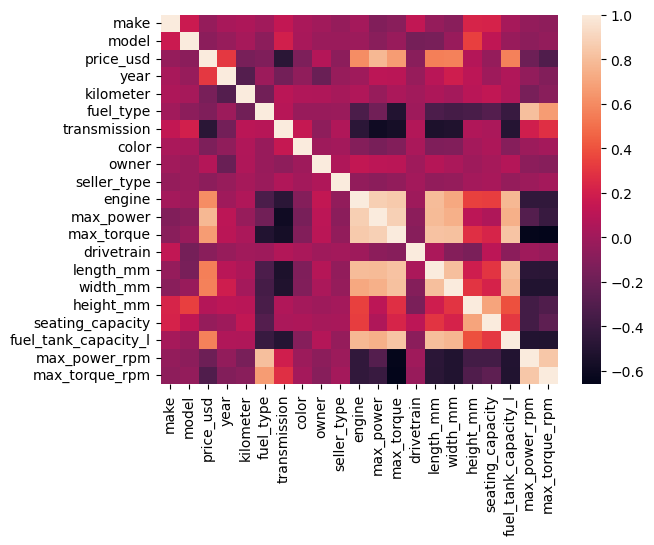

In [105]:
import seaborn as sns
features_corr = car_df.corr()["price_usd"].sort_values(ascending=False)
important_features = features_corr[(features_corr > 0.2) & (features_corr < 1)]
print(important_features)
sns.heatmap(car_df.corr())

In [117]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

y = car_df["price_usd"].values.reshape(-1,1)
X = car_df.drop("price_usd",axis=1)[important_features.index].values
# X = car_df["max_power"].values.reshape(-1,1)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### Model Evalutaion

In [120]:
y_pred =  lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"\tMean Squared Error: {mse:.2f}")
print(f"\tR-squared: {r2:.2f}")


Model Evaluation:
	Mean Squared Error: 286441775.42
	R-squared: 0.72
